# MAC 5768 - Projeto EP2 - Parte 1 - Data Augumentation 


#### Integrantes do grupo:
- Ysabelle Pinheiro de Sousa - ysabellesousa@gmail.com - 11341314
- Roberto Gaui - rgaui@yahoo.com.br - 1851224
- Joaquin Lorenzo Pereira Condori - joaquin.condori@usp.br - 11857963


####  Link para repositório projeto: 

https://github.com/YsabelleSousa/mac_5768_ep_visao_proc_imagens

#### Instrução para download dos dados:

- Original Dataset: https://drive.google.com/file/d/10zncW_BxhBd2x0CpuddXFffeBKK05HAI/view?usp=sharing

- Original Gray Dataset: 

- Augmented Dataset: 


**1)** Gerar o link compartilhável da pasta zipada no google drive e atribuir a permissão de leitura para **"Qualquer pessoa com o link"**

**2)** Baixar os dados do link compartilhável e colocar na pasta **"data"** do repositório.

**3)** Escolher o path de destino e atribuir à variável **"data_path"** na seção **"Extraindo informações dos dados para DF"**


## Importando Bibliotecas

In [9]:
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from utils import utils

In [5]:
data_path = 'data/DATA_EP1'

## Criando Subdiretórios para armazenamento das imagens transformadas

In [3]:
%%time
for root, subdirs, files in os.walk(os.path.abspath(data_path)):
    for subdir in subdirs: 
        if os.path.exists(os.path.abspath('data')):
            os.makedirs(os.path.abspath('data/originalGrayDataset/PB/'+subdir),exist_ok=False)
            os.makedirs(os.path.abspath('data/augmentedDataset/GRD/'+subdir),exist_ok=False)
            os.makedirs(os.path.abspath('data/augmentedDataset/LOG/'+subdir),exist_ok=False)
            os.makedirs(os.path.abspath('data/augmentedDataset/EXP/'+subdir),exist_ok=False)
            os.makedirs(os.path.abspath('data/augmentedDataset/AVG/'+subdir),exist_ok=False)

CPU times: user 8.85 ms, sys: 22.6 ms, total: 31.5 ms
Wall time: 75.5 ms


## Criando funções de transformação

In [6]:
def img_to_gray_scale(file_path):
    img_gray = Image.open(file_path).convert('L')
    return img_gray

def gray_gradient(img_gray):
    x_axis = np.linspace(0, 255, array(img_gray).shape[1])[:, None]
    y_axis = np.linspace(0, 255, array(img_gray).shape[1])[None, :]

    arr = np.sqrt(x_axis ** 2 + y_axis ** 2)

    arr.resize(array(img_gray).shape)
    
    soma_gradient = np.array(array(img_gray),dtype = 'uint8') + np.array(arr,dtype = 'uint8')
    
    return soma_gradient

def log_transformation(file_path):
    image = cv2.imread(file_path)
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(image + 1))
    log_image = np.array(log_image, dtype = 'uint8')
    
    return log_image
    
def exp_transformation(file_path):
    image = cv2.imread(file_path)
    gamma = np.array(255*(image / 255) ** 0.8, dtype = 'uint8')
    return gamma

def mean_filter(img_gray):
    size = 40
    k = np.ones((size,size),np.float32)/(size**2)
    img_filter= cv2.filter2D(array(img_gray),-1,k)
    
    return img_filter

## Aplicando funções de transformações nas imagens

In [7]:
%%time
cont = 0
for root, subdirs, files in os.walk(os.path.abspath(data_path)):
    for file in files:
        if file.count('_') == 5:
            
            file_path = root+'/'+file
            file_class = root.split('/')[-1]
            
            #Salvando imagens em escala de níveis de cinza
            img = img_to_gray_scale(file_path)
            img.save(os.path.abspath('data/originalGrayDataset/PB')+'/'+file_class+'/'+file)
            
            #Soma de fundo com gradientes de níveis de cinza
            img_grad = gray_gradient(img)
            Image.fromarray(img_grad).save(os.path.abspath('data/augmentedDataset/GRD')+'/'+file_class+'/'+file)
            
            # Calculando Logaritmo da imagem
            img_log = log_transformation(file_path)
            Image.fromarray(img_log).save(os.path.abspath('data/augmentedDataset/LOG')+'/'+file_class+'/'+file)
        
            # Calculando Exponencial da imagem
            img_exp = exp_transformation(file_path)
            Image.fromarray(img_exp).save(os.path.abspath('data/augmentedDataset/EXP')+'/'+file_class+'/'+file)
            
            #Calculando Filtro da Média
            img_mean_filter = mean_filter(img)
            Image.fromarray(img_mean_filter).save(os.path.abspath('data/augmentedDataset/AVG')+'/'+file_class+'/'+file)
            
            cont = cont + 1
        
print("Foram processadas %d imagens"%(cont))

/Users/ysabellesousa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


Foram processadas 1116 imagens
CPU times: user 1h 38min 21s, sys: 11min 28s, total: 1h 49min 49s
Wall time: 10h 16min 24s


## Visualizando dataset resultante com MNIST

100%|██████████| 9/9 [00:11<00:00,  1.32s/it]


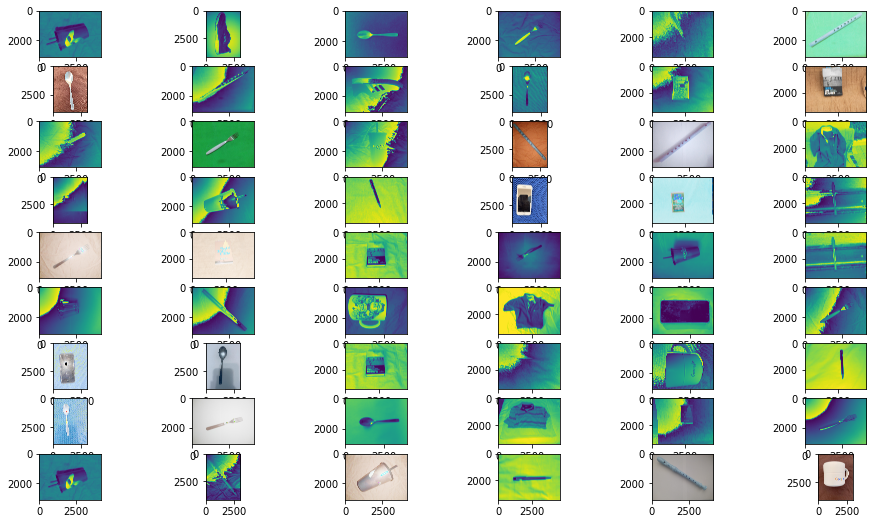

In [10]:
utils.plot_images('data/augmentedDataset/')